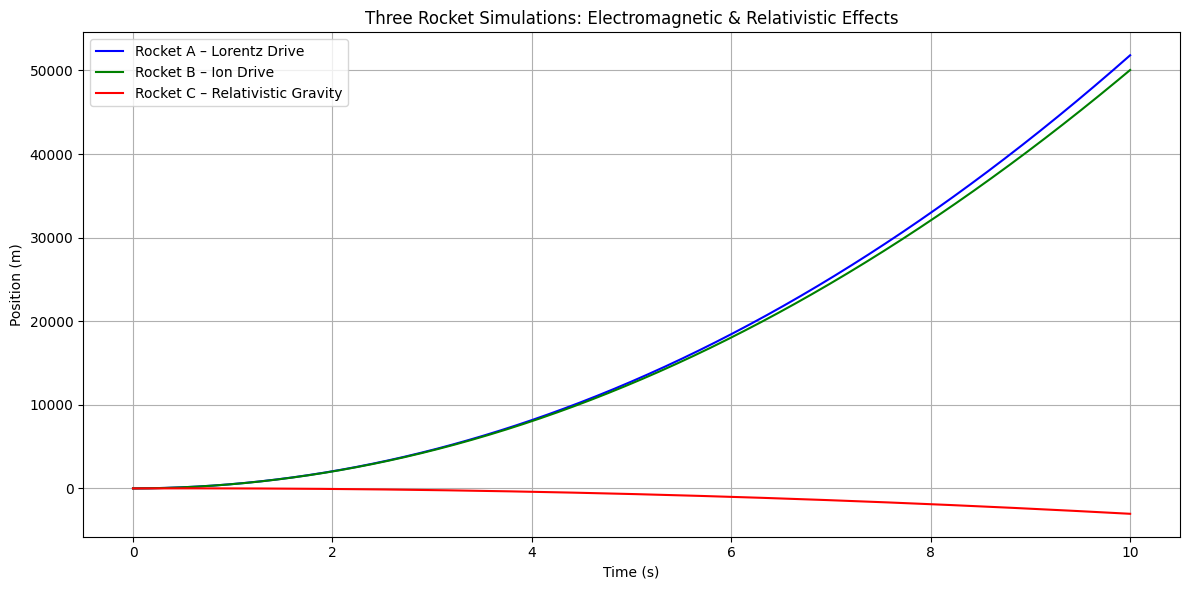

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.0             # Charge of the rocket (Coulombs)
m = 1.0             # Mass of rocket (kg)
E = np.array([1e3]) # Electric field strength (V/m)
B = np.array([0.01])# Magnetic field strength (T)
c = 3e8             # Speed of light (m/s)
G = 6.774e-11       # Gravitational constant
M = 1e24            # Mass of gravitational body (kg)
r0 = 1e6            # Initial distance from gravity source (m)

# Time setup
dt = 0.01
t_max = 10
N = int(t_max / dt)
t = np.linspace(0, t_max, N)

# Arrays: Position, Velocity, Acceleration
pos_A = np.zeros(N)
vel_A = np.zeros(N)

pos_B = np.zeros(N)
vel_B = np.zeros(N)

pos_C = np.zeros(N)
vel_C = np.zeros(N)

# Initial velocities (to see separation)
vel_A[0] = 15
vel_B[0] = 10
vel_C[0] = 35

# Simulation
for i in range(1, N):
    # Rocket A – Lorentz Force: F = q(E + v x B)
    F_A = q * (E[0] + vel_A[i-1] * B[0])  # Simplified 1D
    a_A = F_A / m
    vel_A[i] = vel_A[i-1] + a_A * dt
    pos_A[i] = pos_A[i-1] + vel_A[i] * dt

    # Rocket B – Electrostatic Ion Drive: F = qE only
    F_B = q * E[0]
    a_B = F_B / m
    vel_B[i] = vel_B[i-1] + a_B * dt
    pos_B[i] = pos_B[i-1] + vel_B[i] * dt

    # Rocket C – Symbolic Relativistic Gravity
    # Use Newtonian gravity + symbolic relativistic correction
    r = r0 + pos_C[i-1]
    F_C = -G * M * m / (r**2)
    relativistic_boost = 1 / np.sqrt(1 - (vel_C[i-1] / c)**2) if vel_C[i-1] < c else 1e6
    a_C = F_C / m * relativistic_boost
    vel_C[i] = vel_C[i-1] + a_C * dt
    pos_C[i] = pos_C[i-1] + vel_C[i] * dt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, pos_A, label="Rocket A – Lorentz Drive", color="blue")
plt.plot(t, pos_B, label="Rocket B – Ion Drive", color="green")
plt.plot(t, pos_C, label="Rocket C – Relativistic Gravity", color="red")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Three Rocket Simulations: Electromagnetic & Relativistic Effects")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
